In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
meta_data= pd.read_csv('movies_metadata.csv')
meta_data.head()

C:\Users\user\AppData\Local\Temp\ipykernel_18196\552925849.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  meta_data= pd.read_csv('movies_metadata.csv')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [2]:
meta_data.drop(columns=['homepage','status','video','original_title','imdb_id','poster_path','release_date','production_companies','production_countries','spoken_languages','belongs_to_collection']
               ,inplace=True)
meta_data.head()

,adult,budget,genres,id,original_language,overview,popularity,revenue,runtime,tagline,title,vote_average,vote_count
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,373554033.0,81.0,NaN,Toy Story,7.7,5415.0
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.015539,262797249.0,104.0,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0
2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.7129,0.0,101.0,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,81452156.0,127.0,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0
4,False,0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Just when George Banks has recovered from his ...,8.387519,76578911.0,106.0,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0


In [3]:
rating= pd.read_csv('ratings.csv')
rating.head()

,userId,movieId,rating
0,1,307,3.5
1,1,481,3.5
2,1,1091,1.5
3,1,1257,4.5
4,1,1449,4.5


In [4]:
df = rating['movieId'].value_counts().rename_axis('movieID').reset_index(name='count')
df= df[df['count']>4]
df

,movieID,count
0,356,3606
1,318,3582
2,296,3410
3,593,3244
4,2571,3117
...,...,...
10148,68536,5
10149,26674,5
10150,27392,5
10151,1773,5


In [5]:
#separating movies that have at least 5 reviews
rating1= rating[rating.movieId.isin(df.movieID)]
rating1.head()

,userId,movieId,rating
0,1,307,3.5
1,1,481,3.5
2,1,1091,1.5
3,1,1257,4.5
4,1,1449,4.5


In [7]:
movies= pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


<AxesSubplot:ylabel='Density'>

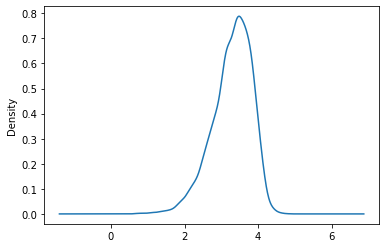

In [9]:
avg_rates= rating1.groupby('movieId')['rating'].mean()
avg_rates.to_frame()['rating'].plot(kind='kde')

In [10]:
top_movies= avg_rates.sort_values(ascending= False).to_frame().index[0:10]
movies[movies.movieId.isin(top_movies)]

,movieId,title,genres
1053,1075,"Sexual Life of the Belgians, The (Vie sexuelle...",Comedy|Romance
5816,5914,"Vernon, Florida (1981)",Documentary
8299,8982,I Am David (2003),Drama
10613,40697,Babylon 5,Sci-Fi
14806,73759,Hellsing Ultimate OVA Series (2006),Action|Animation|Horror
18898,93432,Forks Over Knives (2011),Documentary
35517,142452,Puella Magi Madoka Magica the Movie Part II: E...,Action|Animation|Horror|Mystery
37640,147378,Doctor Who: Planet of the Dead (2009),Adventure|Children|Drama|Sci-Fi
50564,176601,Black Mirror,(no genres listed)
53315,182723,Cosmos: A Spacetime Odissey,(no genres listed)


# Recommend based on overview similarity

In [11]:
meta_data['overview'].head()

0    Led by Woody, Andy's toys live happily in his ...
1    When siblings Judy and Peter discover an encha...
2    A family wedding reignites the ancient feud be...
3    Cheated on, mistreated and stepped on, the wom...
4    Just when George Banks has recovered from his ...
Name: overview, dtype: object

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

meta_data['overview'] = meta_data['overview'].fillna('')

tfidf_matrix = tfidf.fit_transform(meta_data['overview'])
tfidf_matrix.shape

(45466, 75827)

In [13]:
from sklearn.metrics.pairwise import cosine_similarity
tfidf_matrix = tfidf.fit_transform(meta_data['overview'])
cosine_similarity(tfidf_matrix , tfidf_matrix)

array([[1.        , 0.01504121, 0.        , ..., 0.        , 0.00595453,
        0.        ],
       [0.01504121, 1.        , 0.04681953, ..., 0.        , 0.02198641,
        0.00929411],
       [0.        , 0.04681953, 1.        , ..., 0.        , 0.01402548,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.00595453, 0.02198641, 0.01402548, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.00929411, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [16]:
from sklearn.metrics.pairwise import cosine_similarity
meta_data= meta_data[meta_data['vote_count']> meta_data['vote_count'].mean()]
tfidf_matrix = tfidf.fit_transform(meta_data['overview'])
similarity= cosine_similarity(tfidf_matrix , tfidf_matrix)

In [17]:
indices = pd.Series(meta_data.index, index=meta_data['title']).drop_duplicates()
def recommend_movie(movie_name):
    movie_index = indices[movie_name]
    similar_movies= [i[0] for i in sorted(list(enumerate(similarity[movie_index])), key=lambda x: x[1] , reverse= True)[0:5]]
    return meta_data['title'].iloc[similar_movies]
  

In [18]:
recommend_movie('Jumanji') 

1               Jumanji
30398            Pixels
19726    Wreck-It Ralph
2486           eXistenZ
10892        Stay Alive
Name: title, dtype: object

In [19]:
recommend_movie('Sense and Sensibility') 

20                                Get Shorty
9767                                 Be Cool
17696                    Waiting for Forever
10598                              King Kong
10554    Harry Potter and the Goblet of Fire
Name: title, dtype: object

In [20]:
recommend_movie('Toy Story')

0                     Toy Story
15348               Toy Story 3
2997                Toy Story 2
10301    The 40 Year Old Virgin
24523                 Small Fry
Name: title, dtype: object

# See how many movie of different genres we have

In [36]:
genres=[]
for genre in data.genres:
    
    g=genre.split('|')
    for i in g:
         if i not in genres:
            genres.append(i)
genres  

['Drama',
 'Thriller',
 'Comedy',
 'Romance',
 'Horror',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Fantasy',
 'Western',
 'Crime',
 'War',
 'Musical',
 'Children',
 'Mystery',
 'Animation',
 'IMAX',
 'Film-Noir',
 'Documentary',
 '(no genres listed)']

In [37]:
data.genres.value_counts()

Drama                                       72202
Comedy                                      62666
Comedy|Romance                              37805
Drama|Romance                               33774
Comedy|Drama|Romance                        30076
                                            ...  
Comedy|Crime|Horror|Mystery|Thriller            5
Action|Adventure|Romance|War                    5
Comedy|Crime|Drama|Horror                       5
Action|Adventure|Fantasy|Sci-Fi|Thriller        5
Drama|Mystery|Thriller|War                      5
Name: genres, Length: 957, dtype: int64

<AxesSubplot:ylabel='genres'>

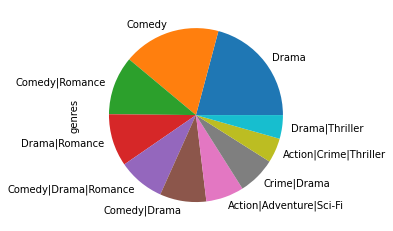

In [39]:
data.genres.value_counts()[0:10].plot(kind='pie')

<AxesSubplot:ylabel='genres'>

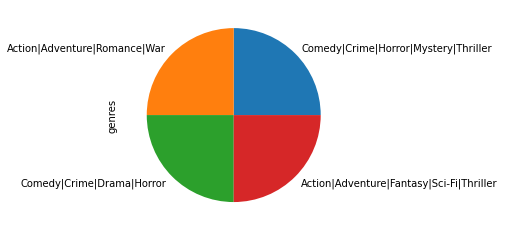

In [40]:
data.genres.value_counts()[-5:-1].plot(kind='pie')

# Merging datasets

In [27]:
data= rating1.merge(movies, on='movieId', how='left')
data.head()

,userId,movieId,rating,title,genres
0,1,307,3.5,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
1,1,481,3.5,Kalifornia (1993),Drama|Thriller
2,1,1091,1.5,Weekend at Bernie's (1989),Comedy
3,1,1257,4.5,Better Off Dead... (1985),Comedy|Romance
4,1,1449,4.5,Waiting for Guffman (1996),Comedy


In [28]:
data.shape

(1028065, 5)

In [29]:
data2 = data['movieId'].value_counts().rename_axis('movieID').reset_index(name='count')
data2= data2[data2['count']>2]
data2.head()

,movieID,count
0,356,3606
1,318,3582
2,296,3410
3,593,3244
4,2571,3117


In [30]:
#keeping mvoies with more than 2 occurance in the list
data= data[data.movieId.isin(data2.movieID)]
data.shape

(1028065, 5)

In [33]:
def best_movies_each_genre(genre):
    data1= data[data.genres==genre]
    top_movies= data1.groupby('title')['rating'].mean()
    return top_movies.sort_values(ascending=False).to_frame().index[0:10]

In [34]:
best_movies_each_genre('Drama')

Index(['I Am David (2003)', 'Opening Night (1977)',
       'Shop on Main Street, The (Obchod na korze) (1965)', 'Ponette (1996)',
       'Close-Up (Nema-ye Nazdik) (1990)', 'Mon oncle d'Amérique (1980)',
       'Dear Wendy (2005)', 'Besieged (a.k.a. L' Assedio) (1998)',
       'Strada, La (1954)', 'Matewan (1987)'],
      dtype='object', name='title')

In [35]:
best_movies_each_genre('Comedy')

Index(['Hail the Conquering Hero (1944)', 'Navigator, The (1924)',
       'George Carlin: It's Bad for Ya! (2008)',
       'Bo Burnham: Make Happy (2016)',
       'Dave Chappelle: For What it's Worth (2004)', 'One, Two, Three (1961)',
       'Schizopolis (1996)', 'Louis C.K.: Live at the Beacon Theater (2011)',
       'Horse Feathers (1932)', 'Cactus Flower (1969)'],
      dtype='object', name='title')

In [41]:
best_movies_each_genre('Thriller')

Index(['The Invisible Guest (2016)', 'Spotlight (2015)',
       'Seven Days in May (1964)', 'Fugitive, The (1993)',
       'Best Offer, The (Migliore offerta, La) (2013)', 'Guest, The (2014)',
       'Borgman (2013)', 'Red Rock West (1992)', 'Eye of the Needle (1981)',
       'Who Am I (Kein System Ist Sicher) (2014)'],
      dtype='object', name='title')